Assignment 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing dataset from google drive. 
Link of dataset: https://drive.google.com/drive/folders/1EdsCgAvp0U7VlNmHzJyVx0bbRgOfjBz3?usp=sharing



---


Dataset description: 
This dataset contains about 10 years of daily weather observations from many locations across Australia.
It predicts if it will rain tomorrow or not. 
This column is Yes if the rain for that day was 1mm or more 
---
*   Date: The date of observation
*   Location: The common name of the location of the weather station
*   MinTemp: The minimum temperature in degrees celsius
*   MaxTemp: The maximum temperature in degrees celsius
*   Rainfall: The amount of rainfall recorded for the day in mm
*  Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am 
*   Sunshine: The number of hours of bright sunshine in the day
*   WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
*   WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   WindDir9am: Direction of the wind at 9am
9 AM:
*   RH:	Relative humidity at 9 am	percent
*   Cld:	Fraction of sky obscured by cloud at 9 am	eighths
*   Dirn:	Wind direction averaged over 10 minutes prior to 9 am	compass points
*   Spd:	Wind speed averaged over 10 minutes prior to 9 am	kilometres per hour
*   MSLP:	Atmospheric pressure reduced to mean sea level at 9 am 














In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/MLAssignment3/weatherAUS.csv"
dataset=pd.read_csv(path, on_bad_lines='skip')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dropping unimportant features and replacing NaN values with mean values of each column.

In [ ]:
dataset.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
dataset.head(5)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


Converting columns that had a string of YES/NO to 0 or 1 
YES -> 1
NO ->0 

In [ ]:
dataset.RainToday = [1 if each == 'Yes' else 0 for each in dataset.RainToday]
dataset.RainTomorrow = [1 if each == 'Yes' else 0 for each in dataset.RainTomorrow]
dataset.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9238,5.7,22.5,0.0,1.8,9.4,31.0,0.0,15.0,75.0,42.0,1016.8,1013.2,5.000000,2.00000,15.3,21.6,0,0
85379,16.1,25.0,0.0,4.6,7.7,22.0,4.0,6.0,74.0,70.0,1019.5,1015.8,3.000000,6.00000,20.8,23.5,0,1
76710,7.5,28.0,0.0,4.8,11.9,50.0,15.0,30.0,76.0,38.0,1013.1,1010.6,4.447461,4.50993,17.3,25.3,0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# input
x = dataset.iloc[:, [0, 16]].values
  
# output
y = dataset.iloc[:, 17].values


Splitting the data into 30% testing and 70% training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Scaling the data using standardization. 
---
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)
print (x_train_scaled[0:10, :])


[[ 1.76081911e+00 -5.30494690e-01]
 [-1.82036193e+00 -5.30494690e-01]
 [ 9.59765456e-01 -5.30494690e-01]
 [ 2.21539541e-01 -5.30494690e-01]
 [-1.25491229e+00 -5.30494690e-01]
 [ 4.41436622e-01 -5.30494690e-01]
 [ 1.64245950e-03 -5.30494690e-01]
 [-4.85272506e-01 -5.30494690e-01]
 [ 4.87632626e-02 -5.30494690e-01]
 [-1.56905098e+00 -5.30494690e-01]]


Training the model using Logistic Regression and Grid Search to find the best value of C and solver

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#from sklearn.model_selection import KFold 
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(x_train_scaled, y_train)
#y_pred = classifier.predict(x_test_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 10, 20, 50],'solver':['lbfgs','newton-cg','liblinear','sag','saga']}
classifier = LogisticRegression(max_iter=50000,penalty='l1',multi_class='ovr',class_weight='balanced',solver='liblinear')
cv = GridSearchCV(classifier, parameters,cv=3)
cv.fit(x_train_scaled, y_train)
cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

{'C': 1, 'solver': 'liblinear'}

In [ ]:
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_test_scaled)
print(y_pred)

[1 0 0 ... 0 1 1]


**Performance Metrics **


1. Confusion Matrix:



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[28933  5165]
 [ 5182  4358]]



2.  Accuracy



In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7628901416196893


3.   ROC

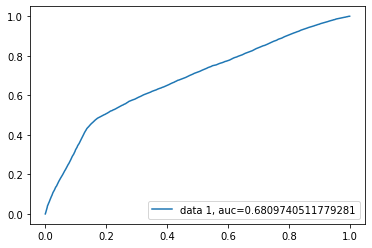

In [ ]:
y_pred_proba = classifier.predict_proba(x_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


4.   Precision


---


The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.The best value is 1 and the worst value is 0.




The average parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:
In the code below I'm trying 3 parameters, macro,micro and weighted.
macro:Calculate metrics globally by counting the total true positives, false negatives and false positives.

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')




0.6528654531853879

Micro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.7628901416196893

Weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [ ]:
precision_score(y_test, y_pred, average='weighted')

0.7627380255084837

5.   Recall


---

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.




In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.6526691286786772

6.   AUC

In [ ]:
_pred_proba = classifier.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)



0.6809740511779281
